# The relation between fertility rate and the gross domestic product per capita in south america

Fertility rate has been a big topic in the industrialized countries in the last decade. The social insurance systems are based on the idea that society will always grow. In other words: the number of children per woman is higher than 2. However, there is a clear trend in the developed countries like here in Germany for families to have fewer children. At the same time we have observed how the GDP per capita has been increasing dramatically over the years. I am interested in the relation between these two factors for emerging countries. in this case I will be analyzing the Spanish speaking countries in South America

## The Dataset

I will be working with a dataset from the world bank with thousends of economic indicators for all countries over the last 50 years. The dataset can be, however, be downloaded from [kaggle](https://www.kaggle.com/worldbank/world-development-indicators). I will be using only the folder "world-development-indicators"

**First let us understand the data**

In [4]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
# import csv data
df = pd.read_csv('./world-development-indicators/indicators.csv')

In [7]:
df.shape

(5656458, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656458 entries, 0 to 5656457
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   CountryName    object 
 1   CountryCode    object 
 2   IndicatorName  object 
 3   IndicatorCode  object 
 4   Year           int64  
 5   Value          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 258.9+ MB


In [9]:
df.isnull().sum()

CountryName      0
CountryCode      0
IndicatorName    0
IndicatorCode    0
Year             0
Value            0
dtype: int64

In [11]:
df.duplicated().sum()

0

This is good, **there are no NaN values or duplicates**

In [12]:
# get to understand the indicators better
df.IndicatorName.nunique()

1344

In [13]:
df.IndicatorCode.nunique()

1344

This means we have 1344 different indicators in the dataset. Take a look to some indicators, to see what could be of interest

In [16]:
df.IndicatorName.unique()[:20]

array(['Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Age dependency ratio (% of working-age population)',
       'Age dependency ratio, old (% of working-age population)',
       'Age dependency ratio, young (% of working-age population)',
       'Arms exports (SIPRI trend indicator values)',
       'Arms imports (SIPRI trend indicator values)',
       'Birth rate, crude (per 1,000 people)', 'CO2 emissions (kt)',
       'CO2 emissions (metric tons per capita)',
       'CO2 emissions from gaseous fuel consumption (% of total)',
       'CO2 emissions from liquid fuel consumption (% of total)',
       'CO2 emissions from liquid fuel consumption (kt)',
       'CO2 emissions from solid fuel consumption (% of total)',
       'Death rate, crude (per 1,000 people)',
       'Fertility rate, total (births per woman)',
       'Fixed telephone subscriptions',
       'Fixed telephone subscriptions (per 100 people)',
       'Hospital beds (per 1,000 people)',
       'Inter

An interesting question would be the relation of the fertility rate and the GDP. Find all variables containing information regarding fertility and GDP

In [21]:
df.IndicatorName[df.IndicatorName.str.contains('Fertility')].unique()

array(['Fertility rate, total (births per woman)'], dtype=object)

In [81]:
# get the code for the indicator
df[df.IndicatorName == 'Fertility rate, total (births per woman)']['IndicatorCode'].values[0]

'SP.DYN.TFRT.IN'

Only one variable showing fertility rates

In [24]:
df.IndicatorName[df.IndicatorName.str.contains('GDP')].unique()

array(['Merchandise trade (% of GDP)',
       'GDP at market prices (current US$)',
       'GDP per capita (current US$)',
       'CO2 emissions (kg per 2005 US$ of GDP)',
       'Exports of goods and services (% of GDP)',
       'External balance on goods and services (% of GDP)',
       'GDP at market prices (constant 2005 US$)',
       'GDP per capita (constant 2005 US$)',
       'General government final consumption expenditure (% of GDP)',
       'Gross fixed capital formation (% of GDP)',
       'Imports of goods and services (% of GDP)', 'Trade (% of GDP)',
       'Agriculture, value added (% of GDP)',
       'Gross capital formation (% of GDP)',
       'Gross domestic savings (% of GDP)',
       'Household final consumption expenditure, etc. (% of GDP)',
       'Industry, value added (% of GDP)',
       'Manufacturing, value added (% of GDP)',
       'Services, etc., value added (% of GDP)',
       'Gross fixed capital formation, private sector (% of GDP)',
       'Final consum

I will be using the usual GDP per capita (current US dollars)

In [82]:
df[df.IndicatorName == 'GDP per capita (current US$)']['IndicatorCode'].values[0]

'NY.GDP.PCAP.CD'

### Research Question and Hypothesis

**Hypothesis:**

An increasing wealth (meassured as GDP per capita) is related to lower fertility rates in South American countries. 

# Data exploration

In [134]:
# first create a dataframe only with the right information

fertility_mask = df.IndicatorCode.isin(['SP.DYN.TFRT.IN'])
gdp_mask = df.IndicatorCode.isin(['NY.GDP.PCAP.CD']) 
indicators_mask = df.IndicatorCode.isin(['SP.DYN.TFRT.IN', 'NY.GDP.PCAP.CD'])

In [121]:
country_mask = (df.CountryCode.isin(['ARG', 'BOL', 'BRA', 'CHL', 'COL', 'ECU',
                                     'PRY', 'PER', 'URY', 'VEN']))

In [135]:
df_fert = df[fertility_mask & country_mask].copy()
df_gdp = df[gdp_mask & country_mask].copy()

In [136]:
df_fert.shape

(540, 6)

In [137]:
df_fert.sample(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
1326820,Peru,PER,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1983,4.600
5333459,Peru,PER,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,2012,2.504
916909,Peru,PER,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1978,5.310
296855,"Venezuela, RB",VEN,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1969,5.605
765993,Paraguay,PRY,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1976,5.198
86812,Chile,CHL,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1963,4.940
3069863,Colombia,COL,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1999,2.432
2388031,Brazil,BRA,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1994,2.537
60614,Ecuador,ECU,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1962,6.676
3520905,Colombia,COL,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,2002,2.311


Check the development of the GDP per year per country

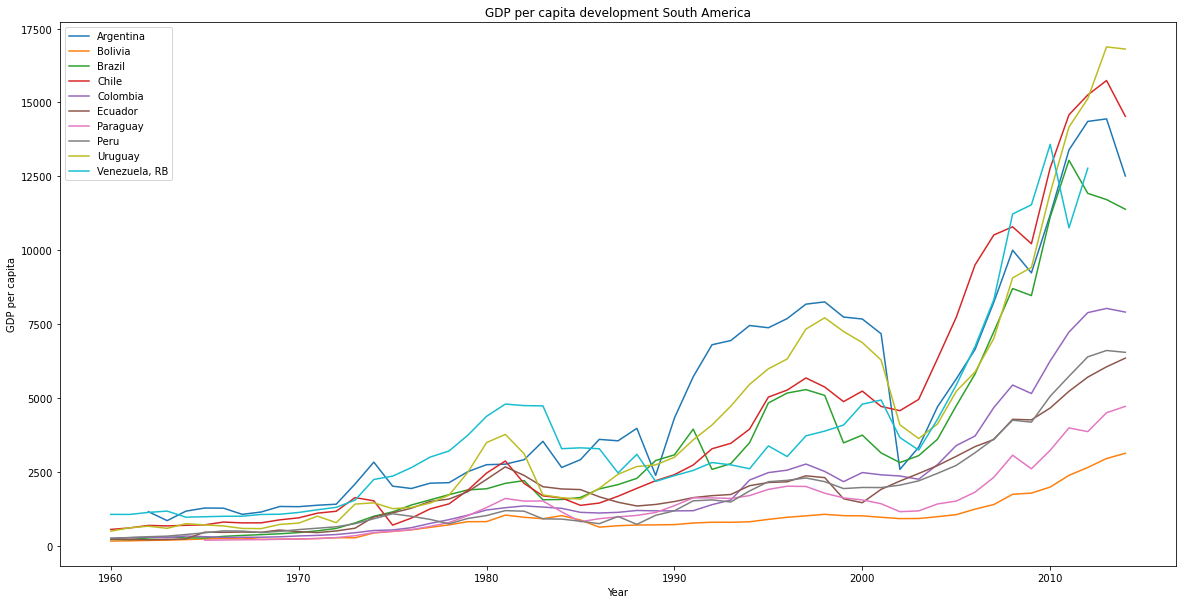

In [218]:
plt.figure(figsize=(20,10))
plt.plot(df_gdp.groupby(['Year', 'CountryName']).mean()['Value'].unstack())
plt.legend(df_gdp.groupby(['Year', 'CountryName']).mean()['Value'].unstack().columns)
plt.title('GDP per capita development South America')
plt.ylabel('GDP per capita')
plt.xlabel('Year');

Check the fertility rate over time

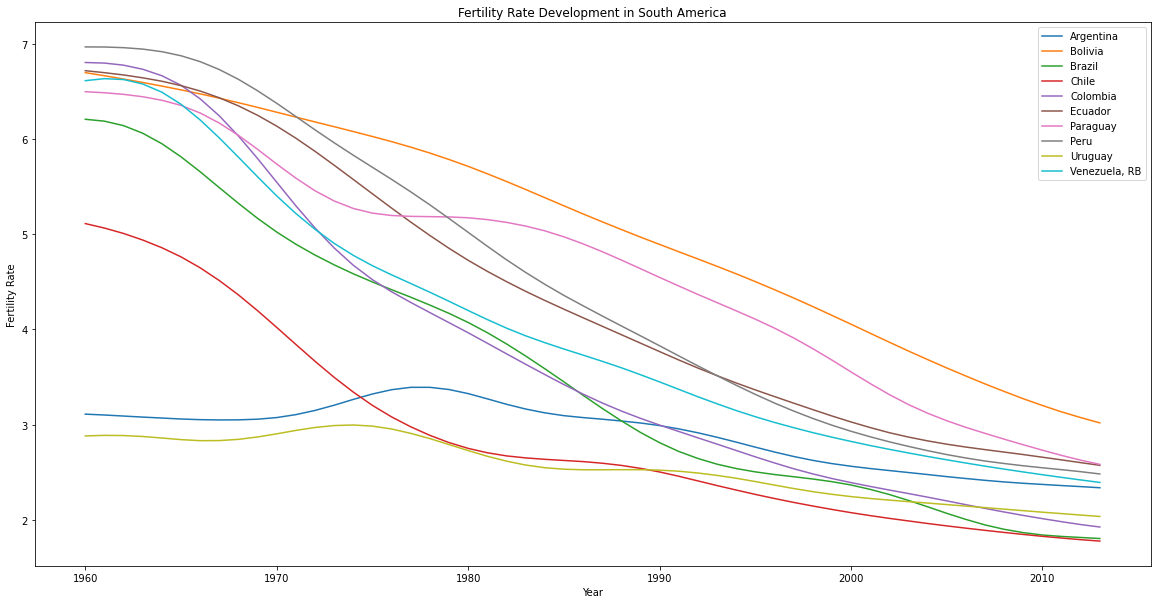

In [220]:
plt.figure(figsize=(20,10))
plt.plot(df_fert.groupby(['Year', 'CountryName']).mean()['Value'].unstack())
plt.legend(df_fert.groupby(['Year', 'CountryName']).mean()['Value'].unstack().columns)
plt.title('Fertility Rate Development in South America')
plt.ylabel('Fertility Rate')
plt.xlabel('Year');

Get the correlation between GDP and fertility rate. For this ignore the time dimension, i.e. treat each year equaly and not sequentially

In [195]:
df_both = df[indicators_mask & country_mask].copy()
df_both['Country_year'] = df_both.CountryName + df_both.Year.astype(str)

In [196]:
df_both.head(3)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value,Country_year
3993,Argentina,ARG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1960,3.109000,Argentina1960
5353,Bolivia,BOL,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,1960,6.700000,Bolivia1960
5371,Bolivia,BOL,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,152.461763,Bolivia1960


In [197]:
df_both.shape

(1081, 7)

To get a better understanding of the correlation, I will keep the Dimension "Year" constant. This means I treat 1960 in the same way I treat 2010. I will compare then all entries for each country for fertility rate and GDP

In [198]:
stage = df_both.pivot(index='Country_year', columns=['IndicatorCode'], values='Value')

In [199]:
stage.head(5)

IndicatorCode,NY.GDP.PCAP.CD,SP.DYN.TFRT.IN
Country_year,,
Argentina1960,NaN,3.109
Argentina1961,NaN,3.100
Argentina1962,1148.579957,3.089
Argentina1963,845.076989,3.078
Argentina1964,1166.317559,3.068


In [201]:
stage.corr()

IndicatorCode,NY.GDP.PCAP.CD,SP.DYN.TFRT.IN
IndicatorCode,,
NY.GDP.PCAP.CD,1.000000,-0.629696
SP.DYN.TFRT.IN,-0.629696,1.000000


We see a negative linear correlation. Plot all the point to understand the correlation better

Text(0.5, 1.0, 'Relation between GDP and Fertility rate when Year being ignored')

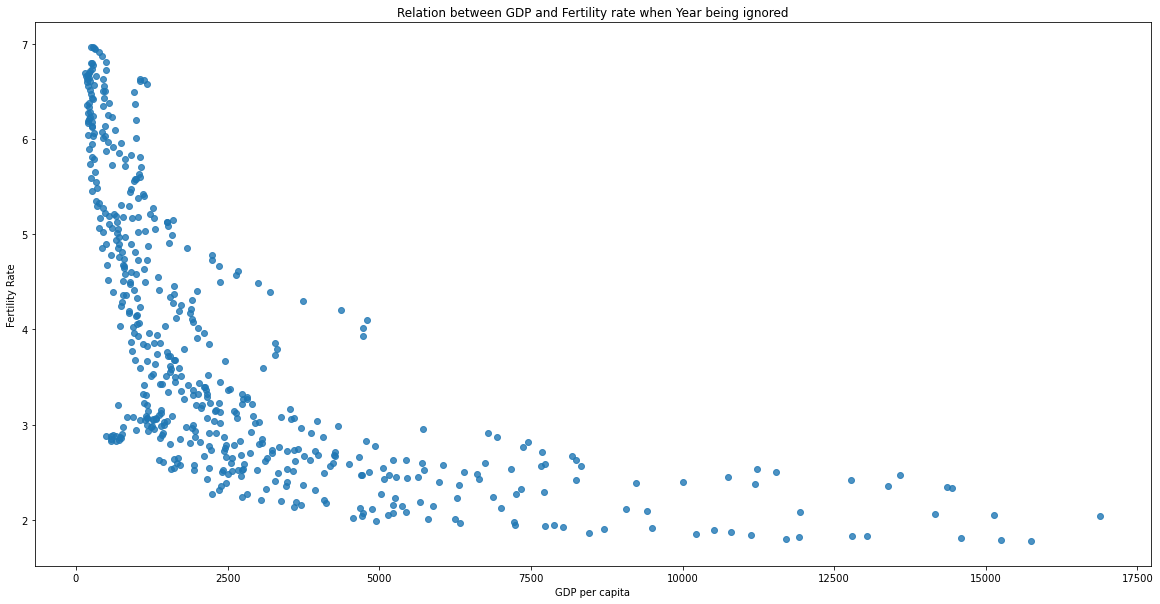

In [205]:
plt.figure(figsize=(20,10))
plt.scatter(data=stage, y='SP.DYN.TFRT.IN', x='NY.GDP.PCAP.CD', alpha=0.8)
plt.xlabel('GDP per capita')
plt.ylabel('Fertility Rate')
plt.title('Relation between GDP and Fertility rate when Year being ignored')

There is clearly a negative relationship between the GDP per capita and the fertility rate. However, this correlation is not linear. Make a simple logarithmic transformation to the GDP per capita to see the linear correlation. This would be very usefull if we wanted to fit a linear regression model to the data.

Text(0.5, 1.0, 'Relation between GDP and Fertility rate when Year being ignored')

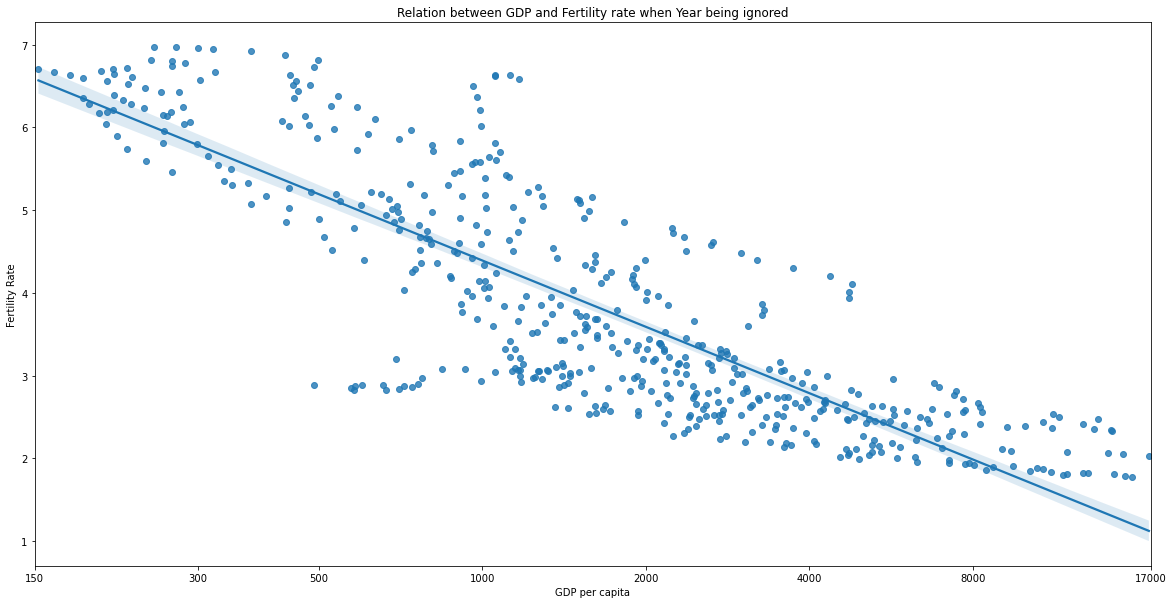

In [217]:
# define the transformation function
def log_trans(x, inverse=False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
    
# plot the function again
plt.figure(figsize=(20,10))
sns.regplot(stage['NY.GDP.PCAP.CD'].apply(log_trans), stage['SP.DYN.TFRT.IN'])
tick_locs = [150, 300, 500, 1000, 2000, 4000, 8000, 17000]
plt.xticks(log_trans(tick_locs), tick_locs)
plt.xlabel('GDP per capita')
plt.ylabel('Fertility Rate')
plt.title('Relation between GDP and Fertility rate when Year being ignored')